<a href="https://colab.research.google.com/github/ChengZhenLi1/MAT-421/blob/main/hw_for_module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Numerical differentiation**

**Section 1: Numerical differentiation problem statement**

Numerical grid: It's an set of points that's in a certain interval of the domain of a function that has same distance between each point.

For example: If x_j-1, x_j. and x_j+1 are all on the numerical grid and they are adjacent. 

Then [ x_j - x_(j-1) ] = [ x_(j+1) - x_(j) ]

**Section 2: Finite Difference approximating derivatives**
1: The derivative of f'(x) of a function f(x) at the point x=a is defined as f^'(a)= the limit
of [f(x)-f(a)]/(x-a) as x is approaching to a.

The derivative of a function f(x) at x=a is the slope at this point.
Three finite difference approximations of the slope:

(1) Forward difference approximation: using point(x_j, f(x_j)) and the next x-value: x_(j+1) is on right side of x_j with f(x_(j+1)) to estimate the slope of the function f(x) at x=x_j

f'(x_j)= [f(x_j+1)-f(x_j)] / [(x_j+1)-(x_j)]

(2) Backward difference approximation: using point(x_j, f(x_j)) and the x-value x_(j-1) that is on the left side of x_j with f(x_(j-1)) to estimate the slope of the function f(x) at x=x_j

f'(x_j)= [f(x_j)-f(x_j-1)] / [(x_j)-(x_j-1)]

(3) Central difference approximation: using points [x_(j-1),f(x_(j-1))], [x_(j+1),f(x_(j+1))] to  estimate the slope of the function f(x) at x=x_j

f'(x_j)= [f(x_j+1)-f(x_j-1)] / [(x_j+1)-(x_j-1)]


2:Taylor series approximation for the derivative of function f(x) around X_j

Given formula: f(x)=[f(x_j)(x-x_j)^0/(0!)+ [f(x_j)' (x-x_j)^1/(1!) + [f(x_j)'' (x-x_j)^2/(2!) + [f(x_j)''' (x-x_j)^3/(3!) + ... 

If x is on the numerical grid with a distance of h and substitute h=x_j+1-x_j

then f(x_j+1)= [f(x_j+1)-f(x_j)]/h + ( [-f''(x_j)h]/2!]-[f'''(x_j)h^2/3!- .... )

Terms in the parentheses are called higher order terms of higher order term of the distance h 
and it can be rewritten as h(a+b(h)), a is a constant and b(h) goes to 0 as h approaches to 0. 

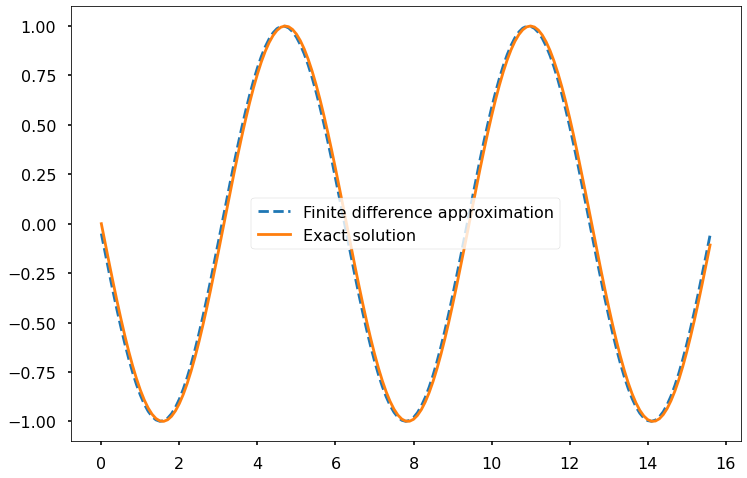

0.049984407218554114


In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
# step size
h = 0.1
# define grid
x = np.arange(0, 5*np.pi, h) 
# compute function
y = np.cos(x) 

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = -np.sin(x_diff) 

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

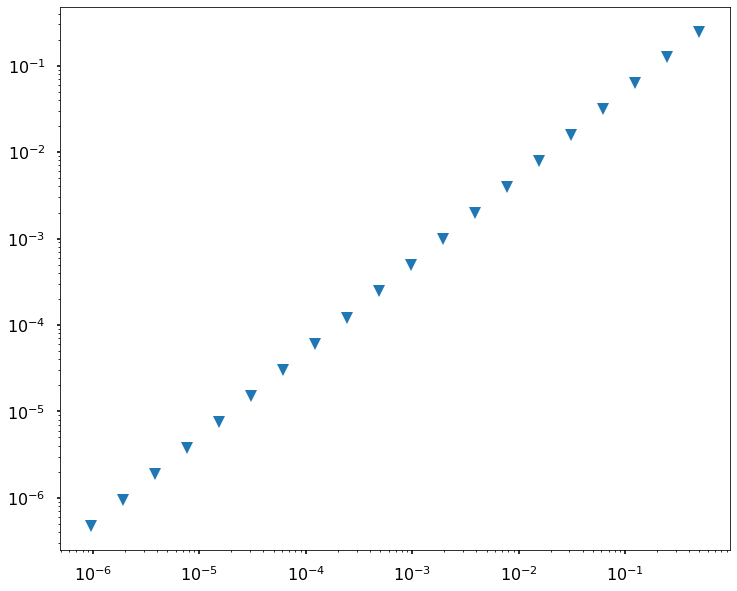

In [16]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20 
# list to store our step sizes
step_size = [] 
# list to store max error for each step size
max_error = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    # store this step size
    step_size.append(h) 
    # compute new grid
    x = np.arange(0, 5 * np.pi, h) 
    # compute function value at grid
    y = np.cos(x) 
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    # compute corresponding grid
    x_diff = x[:-1] 
    # compute exact solution
    exact_solution = -np.sin(x_diff) 
    
    # Compute max error between 
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 10))
plt.loglog(step_size, max_error, 'v')
plt.show()

**Section 4: Numerical Differentiation with noise**

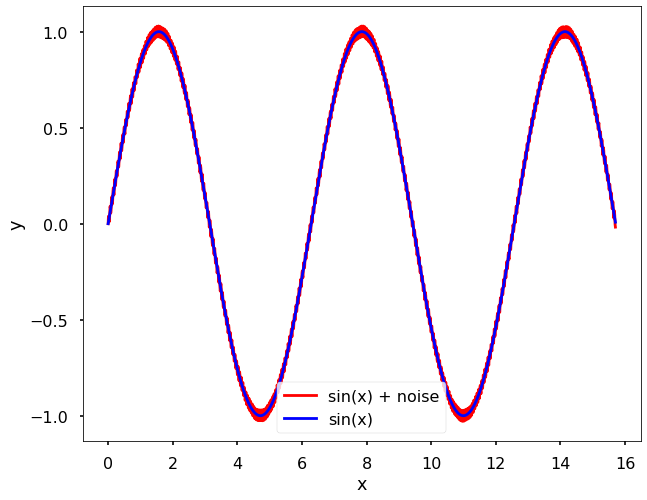

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
x = np.arange(0, 5*np.pi, 0.01) 
# compute function
omega = 130
epsilon = 0.03

y = np.sin(x) 
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (10, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'sin(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'sin(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

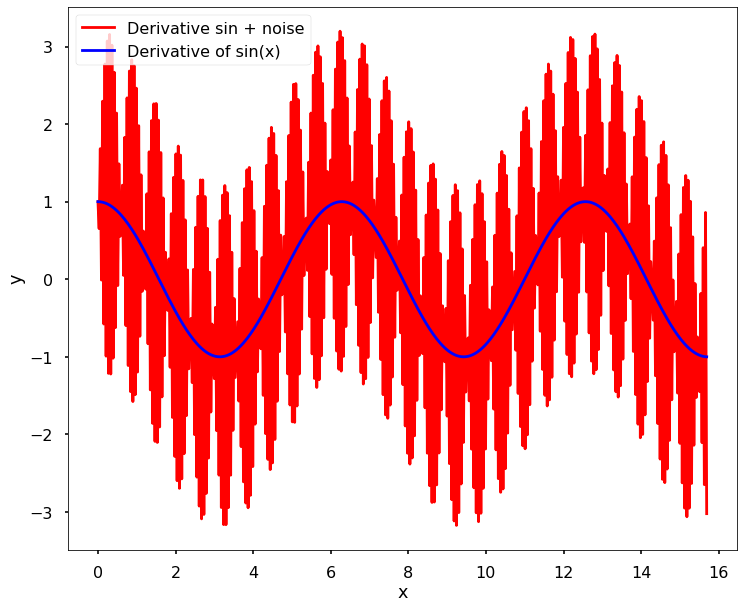

In [42]:
x = np.arange(0, 5*np.pi, 0.03) 
# compute function
y = np.cos(x) 
y_noise = y + epsilon*omega*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 10))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative sin + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of sin(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()